In [ ]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Loading the Dataset
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

Saving airquality.csv to airquality.csv


In [ ]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv(next(iter(uploaded.keys())))

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None

First Few Rows:
         Date      Time  CO(GT)  PT08.S1(CO

### 1. Data Preprocessing:

In [ ]:
# Step 3: Date-Time Parsing
# Combine 'Date' and 'Time' columns into a single 'datetime' column
print("\nParsing Date-Time Columns...")
# Changed the format string to match the actual date-time format in your data
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y-%m-%d %H:%M:%S')
data.set_index('datetime', inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)


Parsing Date-Time Columns...


In [ ]:
# Step 4: Resampling the Data
# Aggregate into hourly averages
print("\nResampling Data into Hourly Averages...")
data = data.resample('H').mean()



Resampling Data into Hourly Averages...


<ipython-input-7-278d2b643eac>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').mean()


In [ ]:
# Step 5: Handling Missing Values
# Check for missing values
print("\nMissing Values Before Imputation:")
print(data.isnull().sum())


Missing Values Before Imputation:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
# Impute missing values using forward fill, backward fill, or interpolation
data.interpolate(method='time', inplace=True)
data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)

<ipython-input-9-5a69900e39fb>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
<ipython-input-9-5a69900e39fb>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
# Step 7: Visualizing Preprocessed Data

print("\nVisualizing Preprocessed Data...")
plt.figure(figsize=(12, 6))
plt.plot(data['CO(GT)'], label='CO(GT)', alpha=0.7)


if 'NO₂(GT)' in data.columns:
    plt.plot(data['NO₂(GT)'], label='NO₂(GT)', alpha=0.7)
else:
    print(f"Warning: Column 'NO₂(GT)' not found in DataFrame. Available columns: {data.columns}")
plt.title('Preprocessed Time Series Data')
plt.xlabel('Datetime')
plt.ylabel('Concentration Levels')
plt.legend()
plt.show()

In [ ]:
print(data.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')



Visualizing Preprocessed Data...


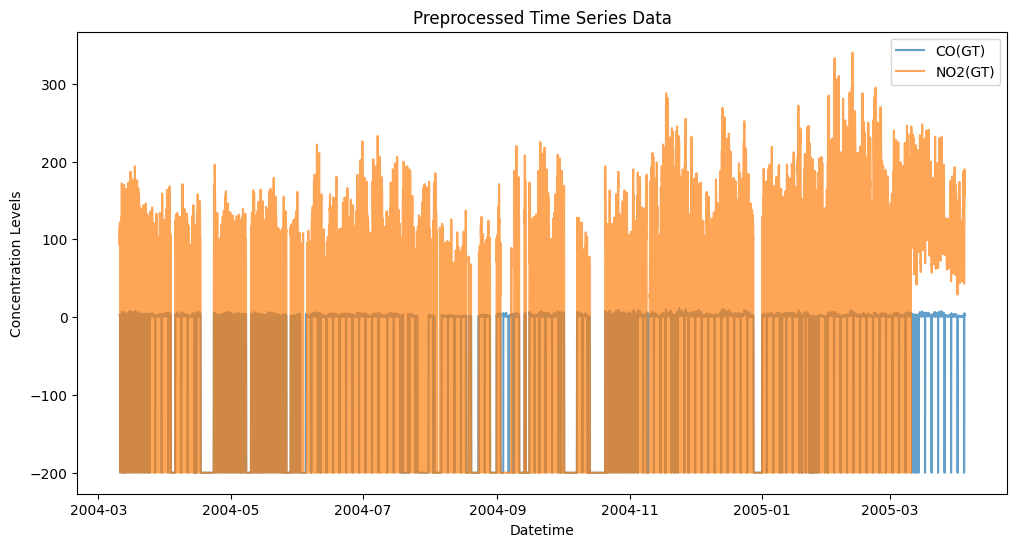

In [ ]:
# Step 7: Visualizing Preprocessed Data
print("\nVisualizing Preprocessed Data...")
plt.figure(figsize=(12, 6))
plt.plot(data['CO(GT)'], label='CO(GT)', alpha=0.7)

# Replace 'NO₂(GT)' with the actual column name from your dataset

plt.plot(data['NO2(GT)'], label='NO2(GT)', alpha=0.7)


plt.title('Preprocessed Time Series Data')
plt.xlabel('Datetime')
plt.ylabel('Concentration Levels')
plt.legend()
plt.show()

### 2. Exploratory Data Analysis (EDA):

In [ ]:
# Step 1: Importing Necessary Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


Visualizing Long-Term Trends...


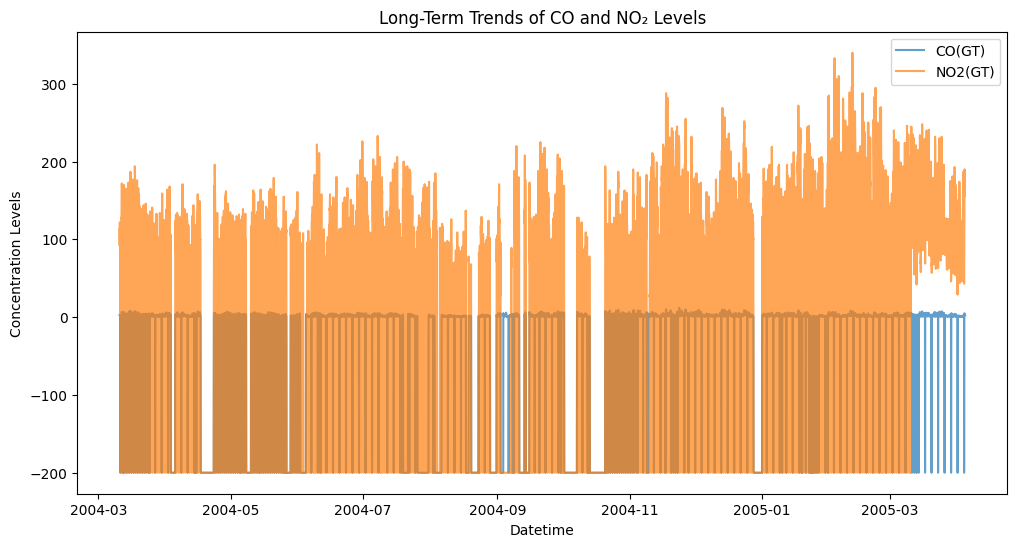

In [ ]:
# Step 2: Trend Analysis
print("\nVisualizing Long-Term Trends...")
plt.figure(figsize=(12, 6))
plt.plot(data['CO(GT)'], label='CO(GT)', alpha=0.7)
# The column name was likely 'NO2(GT)' instead of 'NO₂(GT)'
plt.plot(data['NO2(GT)'], label='NO2(GT)', alpha=0.7)
plt.title('Long-Term Trends of CO and NO₂ Levels')
plt.xlabel('Datetime')
plt.ylabel('Concentration Levels')
plt.legend()
plt.show()


Decomposing Seasonal Patterns...


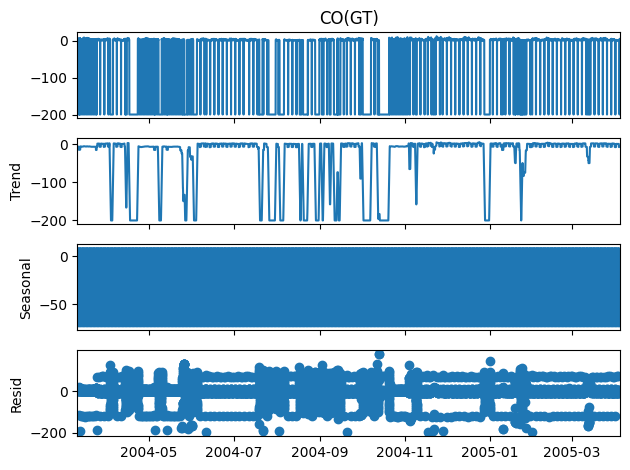

In [ ]:
# Step 3: Seasonality Analysis
print("\nDecomposing Seasonal Patterns...")
# Decompose the time series for 'CO(GT)' as an example
result = seasonal_decompose(data['CO(GT)'], model='additive', period=24,)  # Assuming daily periodicity
result.plot()
plt.suptitle('', fontsize=16)
plt.show()

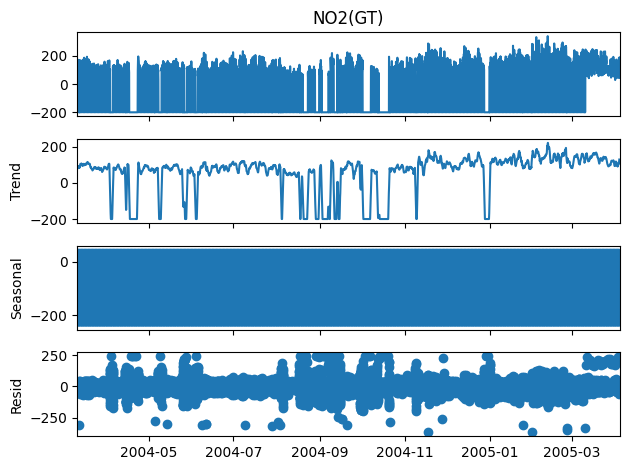

In [ ]:
# Repeat decomposition for 'NO₂(GT)' - Replace 'NO₂(GT)' with the correct column name

result_no2 = seasonal_decompose(data['NO2(GT)'], model='additive', period=24)
result_no2.plot()
plt.suptitle('', fontsize=16)  # Also update the title
plt.show()


Correlation Analysis...


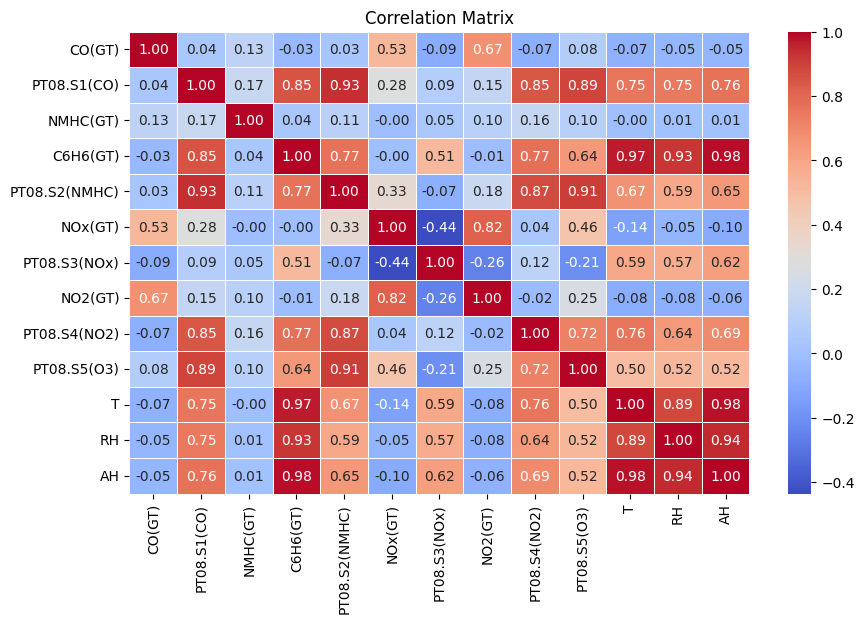

In [ ]:
# Step 4: Correlation Analysis
print("\nCorrelation Analysis...")
# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Highlight specific correlations with CO(GT) and NO₂(GT)
print("\nCorrelation with CO(GT):")
print(correlation_matrix['CO(GT)'].sort_values(ascending=False))

print("\nCorrelation with NO2(GT):")  # Changed 'NO₂(GT)' to 'NO2(GT)'
print(correlation_matrix['NO2(GT)'].sort_values(ascending=False))


Correlation with CO(GT):
CO(GT)           1.000000
NO2(GT)          0.671127
NOx(GT)          0.526451
NMHC(GT)         0.128351
PT08.S5(O3)      0.080310
PT08.S1(CO)      0.041411
PT08.S2(NMHC)    0.029926
C6H6(GT)        -0.031378
AH              -0.045892
RH              -0.048227
T               -0.068939
PT08.S4(NO2)    -0.073724
PT08.S3(NOx)    -0.089981
Name: CO(GT), dtype: float64

Correlation with NO2(GT):
NO2(GT)          1.000000
NOx(GT)          0.817139
CO(GT)           0.671127
PT08.S5(O3)      0.253439
PT08.S2(NMHC)    0.176488
PT08.S1(CO)      0.154030
NMHC(GT)         0.103307
C6H6(GT)        -0.010992
PT08.S4(NO2)    -0.022174
AH              -0.060440
RH              -0.081305
T               -0.084104
PT08.S3(NOx)    -0.256232
Name: NO2(GT), dtype: float64


### 3. Feature Engineering:

In [ ]:
# Step 1: Creating Lag Features
print("\nCreating Lag Features for CO(GT) and NO₂(GT)...")
for lag in range(1, 4):  # Create lag features for 1, 2, and 3 hours
    data[f'CO(GT)_lag{lag}'] = data['CO(GT)'].shift(lag)
    data[f'NO2(GT)_lag{lag}'] = data['NO2(GT)'].shift(lag)



Creating Lag Features for CO(GT) and NO₂(GT)...


In [ ]:
# Step 2: Adding Time-Based Features
print("\nAdding Time-Based Features...")
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month


Adding Time-Based Features...


In [ ]:
# Step 3: Including Environmental Factors
print("\nIncluding Environmental Factors...")
# Check if environmental factors (T, RH, AH) exist in the dataset
if all(col in data.columns for col in ['T', 'RH', 'AH']):
    print("Environmental factors 'T', 'RH', 'AH' included as predictors.")
else:
    print("Some environmental factors are missing. Ensure 'T', 'RH', and 'AH' columns exist.")


Including Environmental Factors...
Environmental factors 'T', 'RH', 'AH' included as predictors.


In [ ]:
# Step 4: Handling Missing Values Introduced by Lag Features
print("\nHandling Missing Values Introduced by Lag Features...")
data.dropna(inplace=True)


Handling Missing Values Introduced by Lag Features...


In [ ]:
# Step 5: Verifying the Dataset After Feature Engineering
print("\nDataset After Feature Engineering:")
print(data.info())
print(data.head())


Dataset After Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9354 entries, 2004-03-10 21:00:00 to 2005-04-04 14:00:00
Freq: h
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9354 non-null   float64
 1   PT08.S1(CO)    9354 non-null   float64
 2   NMHC(GT)       9354 non-null   float64
 3   C6H6(GT)       9354 non-null   float64
 4   PT08.S2(NMHC)  9354 non-null   float64
 5   NOx(GT)        9354 non-null   float64
 6   PT08.S3(NOx)   9354 non-null   float64
 7   NO2(GT)        9354 non-null   float64
 8   PT08.S4(NO2)   9354 non-null   float64
 9   PT08.S5(O3)    9354 non-null   float64
 10  T              9354 non-null   float64
 11  RH             9354 non-null   float64
 12  AH             9354 non-null   float64
 13  CO(GT)_lag1    9354 non-null   float64
 14  NO2(GT)_lag1   9354 non-null   float64
 15  CO(GT)_lag2    9354 non-null   float64
 16  NO2(GT)_lag2   9


Visualizing Time-Based Features and Lag Features...


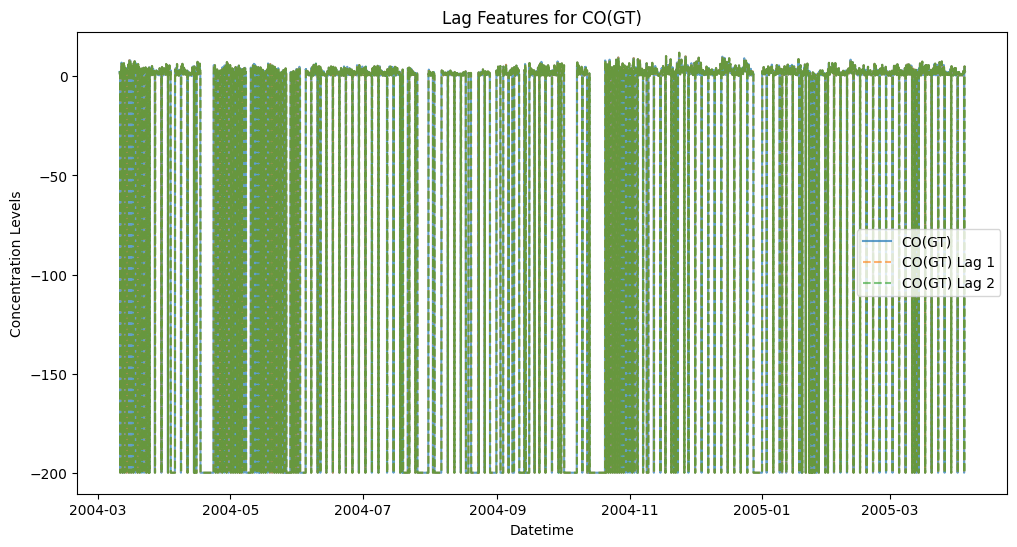

In [ ]:
# Visualizing the Enhanced Features
print("\nVisualizing Time-Based Features and Lag Features...")
plt.figure(figsize=(12, 6))
plt.plot(data['CO(GT)'], label='CO(GT)', alpha=0.7)
plt.plot(data['CO(GT)_lag1'], label='CO(GT) Lag 1', linestyle='--', alpha=0.6)
plt.plot(data['CO(GT)_lag2'], label='CO(GT) Lag 2', linestyle='--', alpha=0.6)
plt.title('Lag Features for CO(GT)')
plt.xlabel('Datetime')
plt.ylabel('Concentration Levels')
plt.legend()
plt.show()

### 4. Time-Series Forecasting:

In [ ]:
# Step 1: Importing Required Libraries for Forecasting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Assuming the preprocessed dataset `data` is already loaded and indexed by 'datetime'

# Define Target Variables
co_target = 'CO(GT)'
no2_target = 'NO2(GT)'

In [ ]:
# Step 2: Splitting Data for Training and Testing
print("\nSplitting Data into Train and Test Sets...")
train_size = 0.8  # 80% for training
train_data, test_data = train_test_split(data, test_size=1-train_size, shuffle=False)


Splitting Data into Train and Test Sets...


In [ ]:
# Step 3: Statistical Models (SARIMA for Univariate Forecasting)
print("\nTraining SARIMA Model for CO(GT)...")
sarima_co = SARIMAX(train_data[co_target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_co = sarima_co.fit()

print("\nTraining SARIMA Model for NO₂(GT)...")
sarima_no2 = SARIMAX(train_data[no2_target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_no2 = sarima_no2.fit()

# Forecasting with SARIMA
co_forecast = result_co.forecast(steps=len(test_data))
no2_forecast = result_no2.forecast(steps=len(test_data))


Training SARIMA Model for CO(GT)...

Training SARIMA Model for NO₂(GT)...


In [ ]:
# Step 5: Deep Learning Models (LSTM for Sequence Forecasting)
print("\nTraining LSTM Models for CO(GT) and NO₂(GT)...")
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[[co_target, no2_target]])

def create_lstm_data(series, look_back=3):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

# Prepare data for LSTM
look_back = 3
co_scaled, no2_scaled = data_scaled[:, 0], data_scaled[:, 1]
X_co, y_co = create_lstm_data(co_scaled, look_back)
X_no2, y_no2 = create_lstm_data(no2_scaled, look_back)

# Split into train and test sets
split_idx = int(len(X_co) * train_size)
X_train_co, X_test_co = X_co[:split_idx], X_co[split_idx:]
y_train_co, y_test_co = y_co[:split_idx], y_co[split_idx:]

split_idx_no2 = int(len(X_no2) * train_size)
X_train_no2, X_test_no2 = X_no2[:split_idx_no2], X_no2[split_idx_no2:]
y_train_no2, y_test_no2 = y_no2[:split_idx_no2], y_no2[split_idx_no2:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM for CO(GT)
lstm_model.fit(X_train_co, y_train_co, epochs=10, batch_size=32, verbose=1)
lstm_co_forecast = lstm_model.predict(X_test_co)

# Train LSTM for NO₂(GT)
lstm_model.fit(X_train_no2, y_train_no2, epochs=10, batch_size=32, verbose=1)
lstm_no2_forecast = lstm_model.predict(X_test_no2)



Training LSTM Models for CO(GT) and NO₂(GT)...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1841
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0324
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0342
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0291
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0299
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0257
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0256
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0294
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0277
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0139
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0147
Epoch 5/10
234/234 ━━━━━━━━━━━━

In [ ]:
# Step 4: Machine Learning Models (Random Forest for Multivariate Forecasting)
print("\nTraining Random Forest Model for CO(GT)...")

# Prepare features and target for CO(GT)
features_co = train_data[['CO(GT)_lag1', 'CO(GT)_lag2', 'CO(GT)_lag3', 'hour', 'day_of_week', 'month', 'T', 'RH', 'AH']]  # Adjust features as needed
target_co = train_data[co_target]

# Create and train the Random Forest model
rf_co = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_co.fit(features_co, target_co)

# Make predictions on the test set
features_co_test = test_data[['CO(GT)_lag1', 'CO(GT)_lag2', 'CO(GT)_lag3', 'hour', 'day_of_week', 'month', 'T', 'RH', 'AH']]  # Adjust features as needed
rf_co_forecast = rf_co.predict(features_co_test)

print("\nTraining Random Forest Model for NO₂(GT)...")

# Prepare features and target for NO₂(GT)
features_no2 = train_data[['NO2(GT)_lag1', 'NO2(GT)_lag2', 'NO2(GT)_lag3', 'hour', 'day_of_week', 'month', 'T', 'RH', 'AH']]  # Adjust features as needed
target_no2 = train_data[no2_target]

# Create and train the Random Forest model
rf_no2 = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_no2.fit(features_no2, target_no2)

# Make predictions on the test set
features_no2_test = test_data[['NO2(GT)_lag1', 'NO2(GT)_lag2', 'NO2(GT)_lag3', 'hour', 'day_of_week', 'month', 'T', 'RH', 'AH']]  # Adjust features as needed
rf_no2_forecast = rf_no2.predict(features_no2_test)



Training Random Forest Model for CO(GT)...

Training Random Forest Model for NO₂(GT)...


In [ ]:
# Step 6: Model Evaluation
print("\nEvaluating Models...")
models = {
    'SARIMA CO': (test_data[co_target], co_forecast),
    'SARIMA NO₂': (test_data[no2_target], no2_forecast),
    'RF CO': (y_test_co, rf_co_forecast),
    'RF NO₂': (y_test_no2, rf_no2_forecast),
    'LSTM CO': (y_test_co, lstm_co_forecast.flatten()),
    'LSTM NO₂': (y_test_no2, lstm_no2_forecast.flatten())
}

for model_name, (actual, predicted) in models.items():
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}")


Evaluating Models...
SARIMA CO - MSE: 4923.3440, MAE: 54.8810
SARIMA NO₂ - MSE: 14617.9936, MAE: 109.3253
RF CO - MSE: 839.9584, MAE: 9.8058
RF NO₂ - MSE: 21211.4539, MAE: 137.3830
LSTM CO - MSE: 0.0241, MAE: 0.0482
LSTM NO₂ - MSE: 0.0167, MAE: 0.0814


### 5. Model Evaluation:

In [ ]:
# Step 1: Importing Required Libraries for Forecasting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Target Variables
co_target = 'CO(GT)'
no2_target = 'NO2(GT)'

In [ ]:
# Step 2: Splitting Data for Training and Testing
print("\nSplitting Data into Train and Test Sets...")
train_size = 0.8  # 80% for training
train_data, test_data = train_test_split(data, test_size=1-train_size, shuffle=False)


Splitting Data into Train and Test Sets...


In [ ]:
# Step 3: Statistical Models (SARIMA for Univariate Forecasting)
print("\nTraining SARIMA Model for CO(GT)...")
sarima_co = SARIMAX(train_data[co_target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_co = sarima_co.fit()

print("\nTraining SARIMA Model for NO₂(GT)...")
sarima_no2 = SARIMAX(train_data[no2_target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_no2 = sarima_no2.fit()

# Forecasting with SARIMA
co_forecast = result_co.forecast(steps=len(test_data))
no2_forecast = result_no2.forecast(steps=len(test_data))


Training SARIMA Model for CO(GT)...

Training SARIMA Model for NO₂(GT)...


In [ ]:
# Step 5: Deep Learning Models (LSTM for Sequence Forecasting)
print("\nTraining LSTM Models for CO(GT) and NO₂(GT)...")
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[[co_target, no2_target]])

def create_lstm_data(series, look_back=3):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

# Prepare data for LSTM
look_back = 3
co_scaled, no2_scaled = data_scaled[:, 0], data_scaled[:, 1]
X_co, y_co = create_lstm_data(co_scaled, look_back)
X_no2, y_no2 = create_lstm_data(no2_scaled, look_back)

# Split into train and test sets
split_idx = int(len(X_co) * train_size)
X_train_co, X_test_co = X_co[:split_idx], X_co[split_idx:]
y_train_co, y_test_co = y_co[:split_idx], y_co[split_idx:]

split_idx_no2 = int(len(X_no2) * train_size)
X_train_no2, X_test_no2 = X_no2[:split_idx_no2], X_no2[split_idx_no2:]
y_train_no2, y_test_no2 = y_no2[:split_idx_no2], y_no2[split_idx_no2:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM for CO(GT)
lstm_model.fit(X_train_co, y_train_co, epochs=10, batch_size=32, verbose=1)
lstm_co_forecast = lstm_model.predict(X_test_co)

# Train LSTM for NO₂(GT)
lstm_model.fit(X_train_no2, y_train_no2, epochs=10, batch_size=32, verbose=1)
lstm_no2_forecast = lstm_model.predict(X_test_no2)



Training LSTM Models for CO(GT) and NO₂(GT)...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1787
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0346
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0358
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0314
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0280
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0277
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0273
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0257
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0234
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0221
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0146
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0147
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0131
Epoch 5/10
234/234 ━━━━━━━━━━━


Evaluating Models...
SARIMA CO - MSE: 4923.3440, MAE: 54.8810, MAPE: 3864.82%, RMSE: 70.1665
SARIMA NO₂ - MSE: 14617.9936, MAE: 109.3253, MAPE: 78.96%, RMSE: 120.9049
RF CO - MSE: 839.9584, MAE: 9.8058, MAPE: inf%, RMSE: 28.9820
RF NO₂ - MSE: 21211.4539, MAE: 137.3830, MAPE: inf%, RMSE: 145.6415
LSTM CO - MSE: 0.0260, MAE: 0.0586, MAPE: inf%, RMSE: 0.1613
LSTM NO₂ - MSE: 0.0161, MAE: 0.0772, MAPE: inf%, RMSE: 0.1269


<ipython-input-56-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
<ipython-input-56-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
<ipython-input-56-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
<ipython-input-56-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


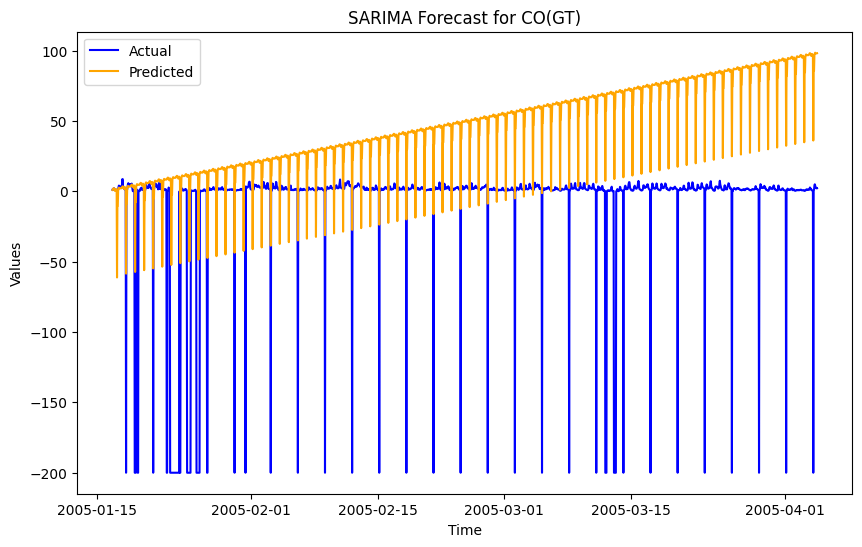

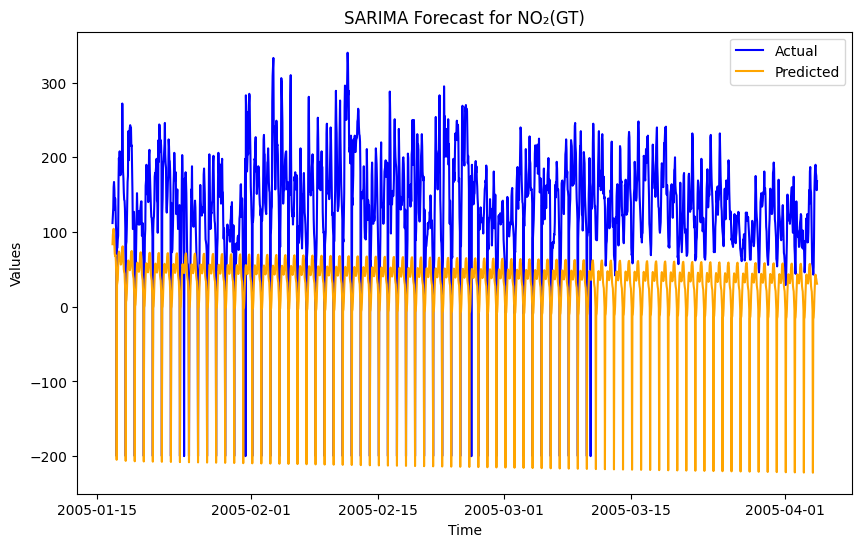

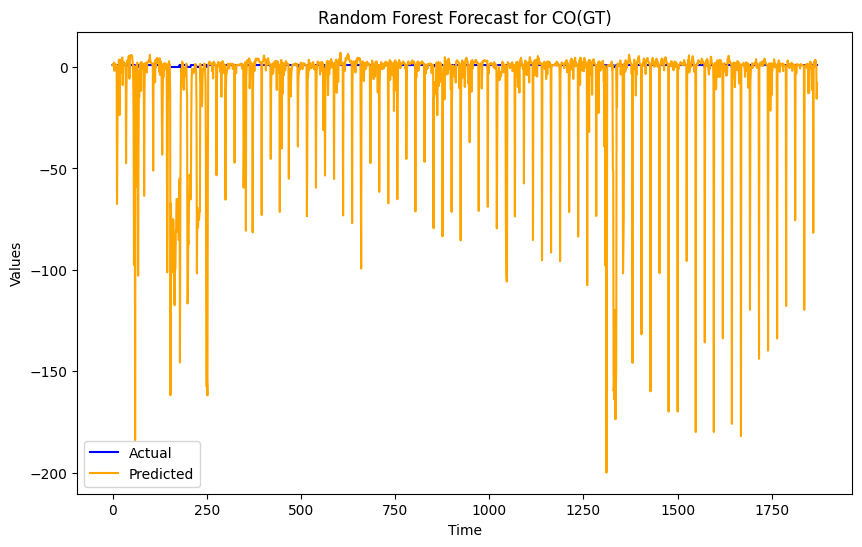

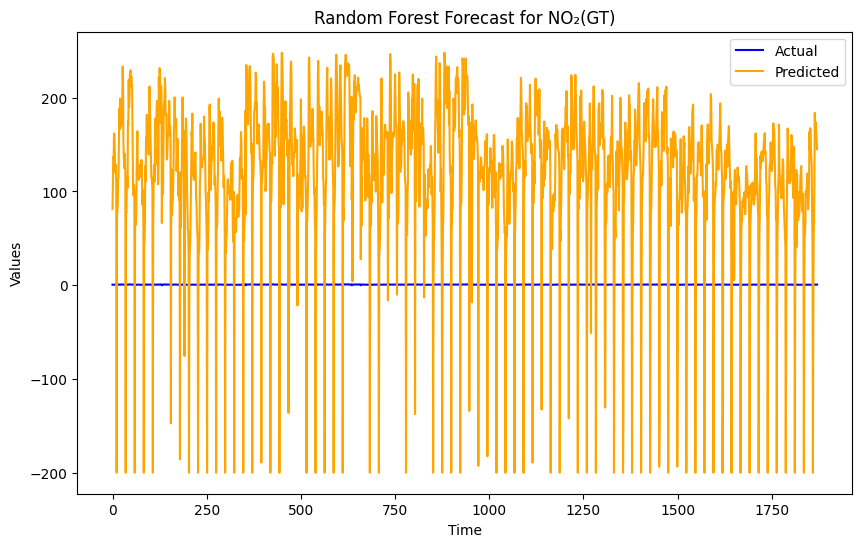

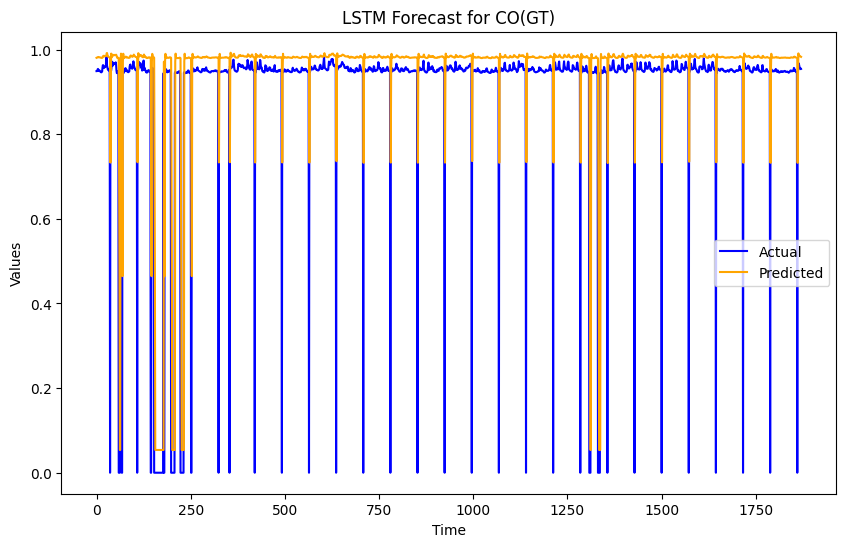

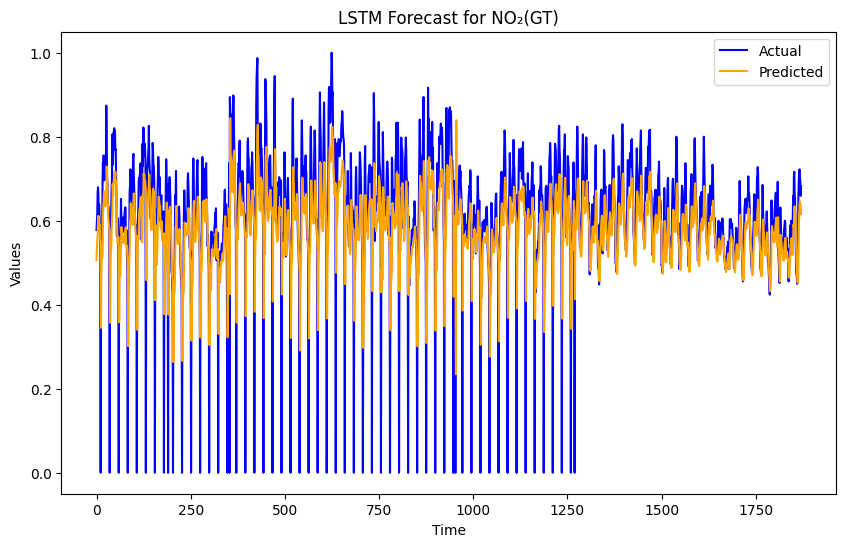

In [ ]:
# Step 6: Model Evaluation
print("\nEvaluating Models...")
def evaluate_forecast(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    rmse = np.sqrt(mse)
    return mse, mae, mape, rmse

models = {
    'SARIMA CO': (test_data[co_target], co_forecast),
    'SARIMA NO₂': (test_data[no2_target], no2_forecast),
    'RF CO': (y_test_co, rf_co_forecast),
    'RF NO₂': (y_test_no2, rf_no2_forecast),
    'LSTM CO': (y_test_co, lstm_co_forecast.flatten()),
    'LSTM NO₂': (y_test_no2, lstm_no2_forecast.flatten())
}

for model_name, (actual, predicted) in models.items():
    mse, mae, mape, rmse = evaluate_forecast(actual, predicted)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%, RMSE: {rmse:.4f}")

# Plot Actual vs Predicted Values
def plot_forecast(actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predicted, label='Predicted', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

plot_forecast(test_data[co_target], co_forecast, 'SARIMA Forecast for CO(GT)')
plot_forecast(test_data[no2_target], no2_forecast, 'SARIMA Forecast for NO₂(GT)')
plot_forecast(y_test_co, rf_co_forecast, 'Random Forest Forecast for CO(GT)')
plot_forecast(y_test_no2, rf_no2_forecast, 'Random Forest Forecast for NO₂(GT)')
plot_forecast(y_test_co, lstm_co_forecast.flatten(), 'LSTM Forecast for CO(GT)')
plot_forecast(y_test_no2, lstm_no2_forecast.flatten(), 'LSTM Forecast for NO₂(GT)')


### 6. Visualization and Insights

In [ ]:
# Step 1: Importing Required Libraries for Forecasting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Target Variables
co_target = 'CO(GT)'
no2_target = 'NO2(GT)'

In [ ]:
# Step 2: Splitting Data for Training and Testing
print("\nSplitting Data into Train and Test Sets...")
train_size = 0.8  # 80% for training
train_data, test_data = train_test_split(data, test_size=1-train_size, shuffle=False)


Splitting Data into Train and Test Sets...


In [ ]:
# Step 3: Statistical Models (SARIMA for Univariate Forecasting)
print("\nTraining SARIMA Model for CO(GT)...")
sarima_co = SARIMAX(train_data[co_target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_co = sarima_co.fit()

print("\nTraining SARIMA Model for NO₂(GT)...")
sarima_no2 = SARIMAX(train_data[no2_target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
result_no2 = sarima_no2.fit()

# Forecasting with SARIMA
co_forecast = result_co.forecast(steps=len(test_data))
no2_forecast = result_no2.forecast(steps=len(test_data))


Training SARIMA Model for CO(GT)...

Training SARIMA Model for NO₂(GT)...


In [ ]:
# Step 4: Machine Learning Models (Random Forest for Multivariate Forecasting)
print("\nTraining Random Forest for Multivariate Forecasting...")
# Define features and target variables
features = [col for col in data.columns if col not in [co_target, no2_target]]
X_train, X_test = train_data[features], test_data[features]
y_train_co, y_test_co = train_data[co_target], test_data[co_target]
y_train_no2, y_test_no2 = train_data[no2_target], test_data[no2_target]

rf_co = RandomForestRegressor()
rf_no2 = RandomForestRegressor()

# Train the models
rf_co.fit(X_train, y_train_co)
rf_no2.fit(X_train, y_train_no2)

# Predictions
rf_co_forecast = rf_co.predict(X_test)
rf_no2_forecast = rf_no2.predict(X_test)


Training Random Forest for Multivariate Forecasting...


In [ ]:
# Step 5: Deep Learning Models (LSTM for Sequence Forecasting)
print("\nTraining LSTM Models for CO(GT) and NO₂(GT)...")
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[[co_target, no2_target]])

def create_lstm_data(series, look_back=3):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

# Prepare data for LSTM
look_back = 3
co_scaled, no2_scaled = data_scaled[:, 0], data_scaled[:, 1]
X_co, y_co = create_lstm_data(co_scaled, look_back)
X_no2, y_no2 = create_lstm_data(no2_scaled, look_back)

# Split into train and test sets
split_idx = int(len(X_co) * train_size)
X_train_co, X_test_co = X_co[:split_idx], X_co[split_idx:]
y_train_co, y_test_co = y_co[:split_idx], y_co[split_idx:]

split_idx_no2 = int(len(X_no2) * train_size)
X_train_no2, X_test_no2 = X_no2[:split_idx_no2], X_no2[split_idx_no2:]
y_train_no2, y_test_no2 = y_no2[:split_idx_no2], y_no2[split_idx_no2:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM for CO(GT)
lstm_model.fit(X_train_co, y_train_co, epochs=10, batch_size=32, verbose=1)
lstm_co_forecast = lstm_model.predict(X_test_co)

# Train LSTM for NO₂(GT)
lstm_model.fit(X_train_no2, y_train_no2, epochs=10, batch_size=32, verbose=1)
lstm_no2_forecast = lstm_model.predict(X_test_no2)



Training LSTM Models for CO(GT) and NO₂(GT)...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1984
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0303
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0330
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0315
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0301
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0248
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0279
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0262
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0239
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0153
Epoch 5/10
234/234 ━━━━━━━━━━━


Evaluating Models...
SARIMA CO - MSE: 4923.3440, MAE: 54.8810, MAPE: 3864.82%, RMSE: 70.1665
SARIMA NO₂ - MSE: 14617.9936, MAE: 109.3253, MAPE: 78.96%, RMSE: 120.9049
RF CO - MSE: 638.8036, MAE: 8.8780, MAPE: inf%, RMSE: 25.2746
RF NO₂ - MSE: 19279.6152, MAE: 132.3467, MAPE: inf%, RMSE: 138.8511
LSTM CO - MSE: 0.0240, MAE: 0.0463, MAPE: inf%, RMSE: 0.1549
LSTM NO₂ - MSE: 0.0152, MAE: 0.0671, MAPE: inf%, RMSE: 0.1234


<ipython-input-66-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
<ipython-input-66-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
<ipython-input-66-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
<ipython-input-66-4909255b44eb>:6: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100


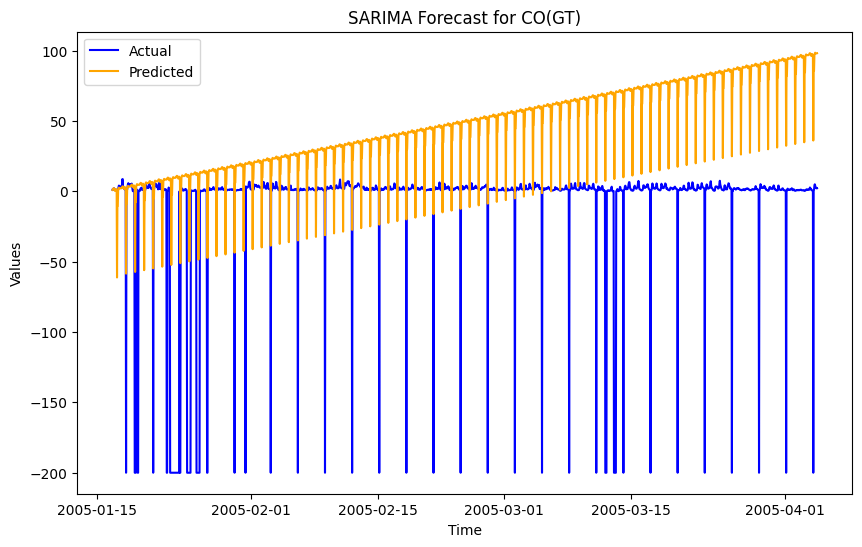

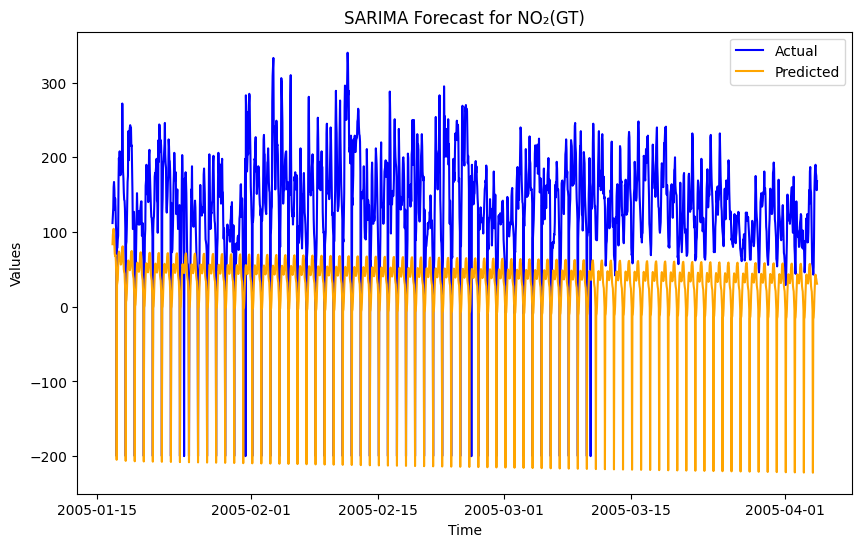

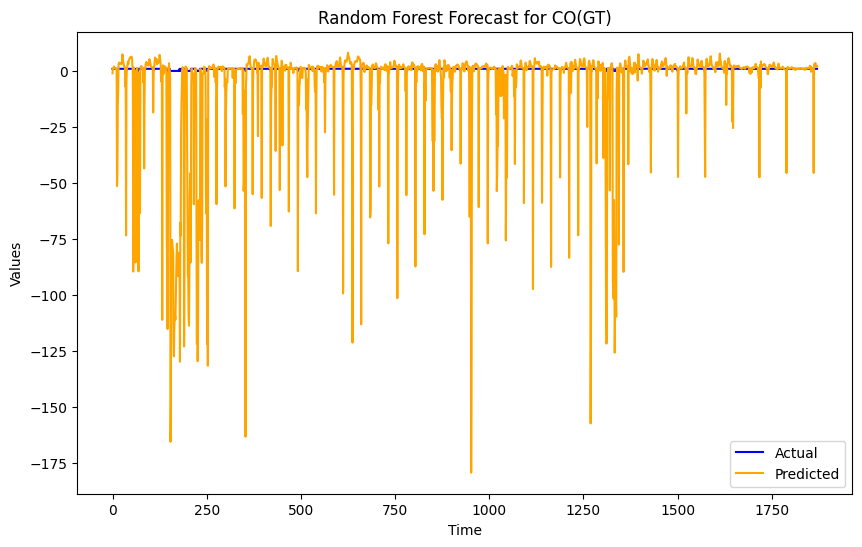

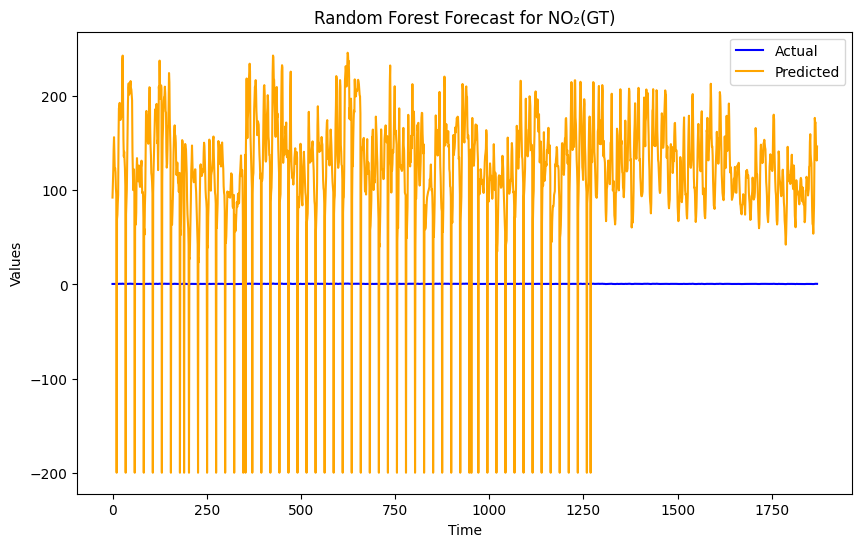

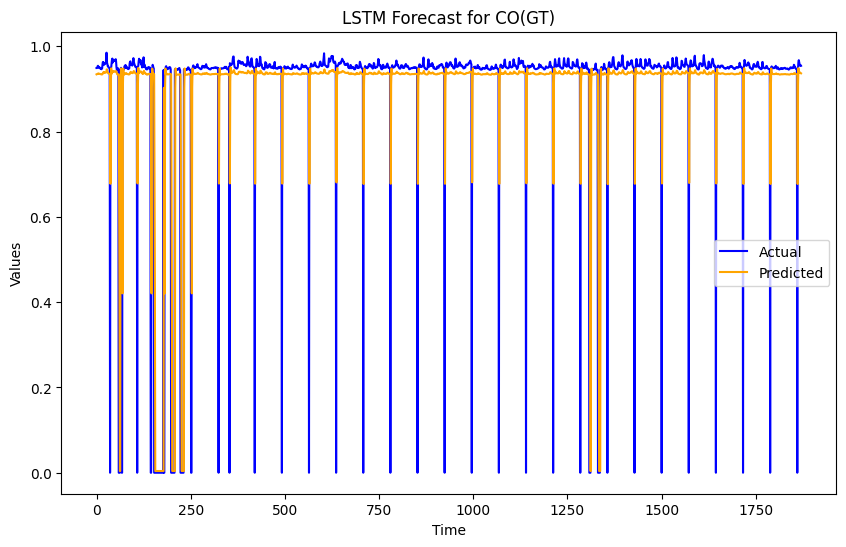

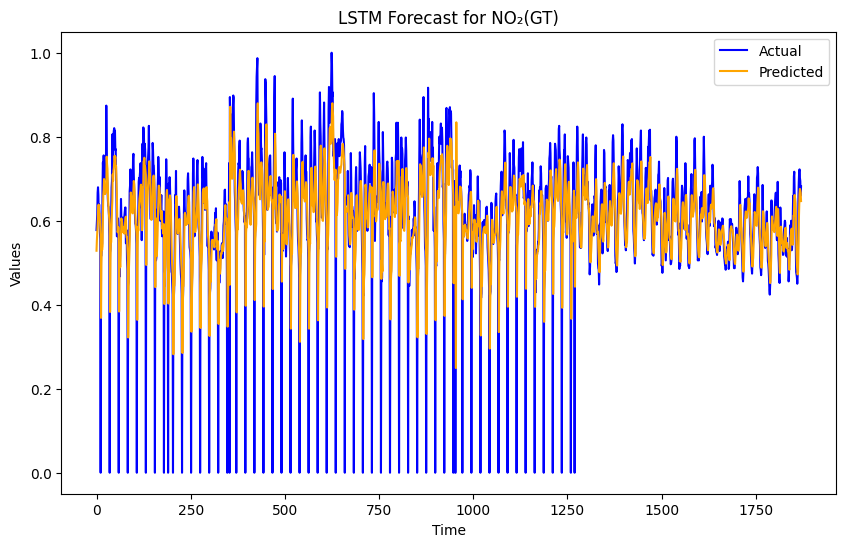

In [ ]:
# Step 6: Model Evaluation
print("\nEvaluating Models...")
def evaluate_forecast(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    rmse = np.sqrt(mse)
    return mse, mae, mape, rmse

models = {
    'SARIMA CO': (test_data[co_target], co_forecast),
    'SARIMA NO₂': (test_data[no2_target], no2_forecast),
    'RF CO': (y_test_co, rf_co_forecast),
    'RF NO₂': (y_test_no2, rf_no2_forecast),
    'LSTM CO': (y_test_co, lstm_co_forecast.flatten()),
    'LSTM NO₂': (y_test_no2, lstm_no2_forecast.flatten())
}

for model_name, (actual, predicted) in models.items():
    mse, mae, mape, rmse = evaluate_forecast(actual, predicted)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%, RMSE: {rmse:.4f}")

# Plot Actual vs Predicted Values
def plot_forecast(actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predicted, label='Predicted', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

plot_forecast(test_data[co_target], co_forecast, 'SARIMA Forecast for CO(GT)')
plot_forecast(test_data[no2_target], no2_forecast, 'SARIMA Forecast for NO₂(GT)')
plot_forecast(y_test_co, rf_co_forecast, 'Random Forest Forecast for CO(GT)')
plot_forecast(y_test_no2, rf_no2_forecast, 'Random Forest Forecast for NO₂(GT)')
plot_forecast(y_test_co, lstm_co_forecast.flatten(), 'LSTM Forecast for CO(GT)')
plot_forecast(y_test_no2, lstm_no2_forecast.flatten(), 'LSTM Forecast for NO₂(GT)')



Generating Future Forecasts and Insights...


<ipython-input-68-a3ce41f6429b>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='H')[1:]


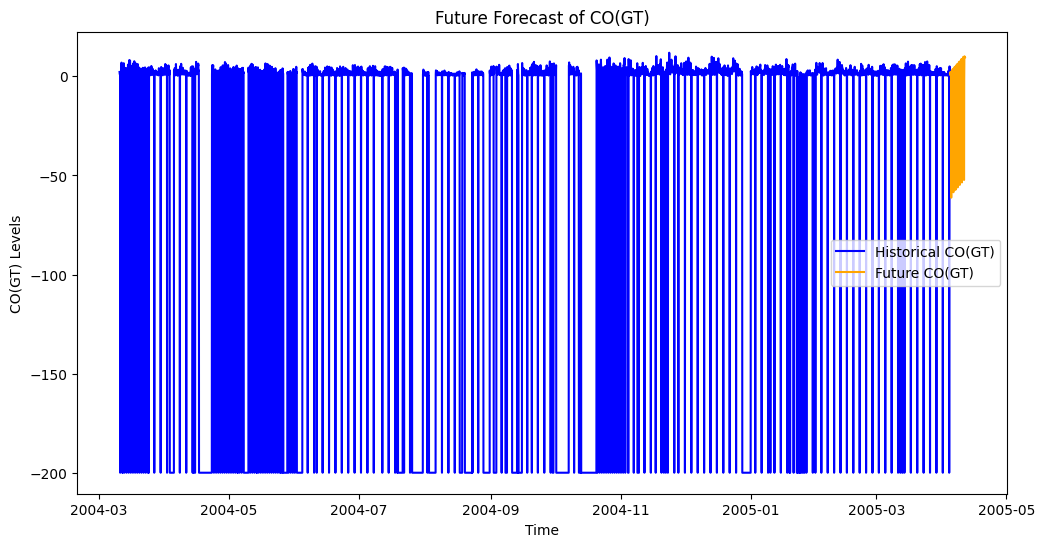

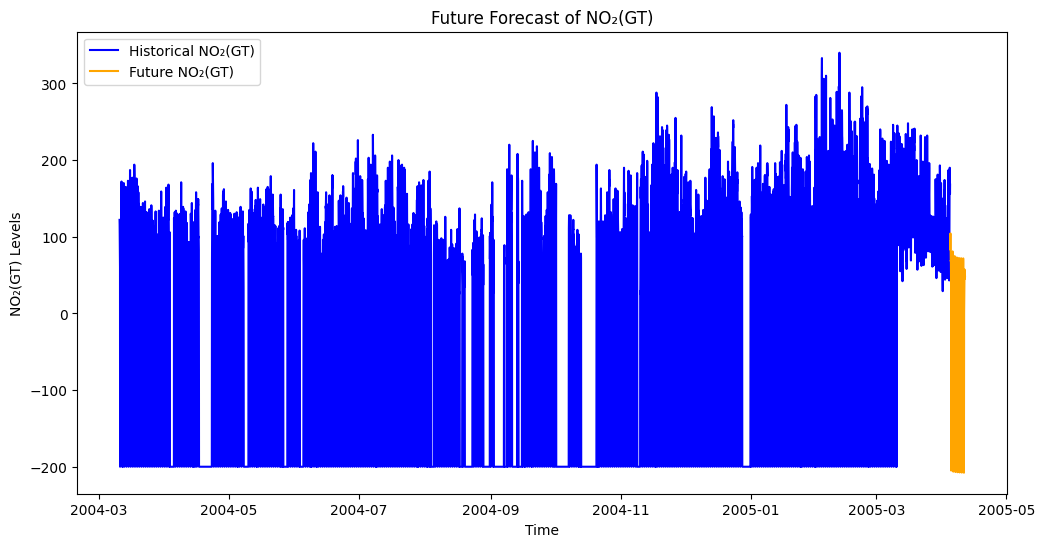


Insights and Recommendations:


<ipython-input-68-a3ce41f6429b>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_co = data[co_target].resample('M').mean()
<ipython-input-68-a3ce41f6429b>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_no2 = data[no2_target].resample('M').mean()


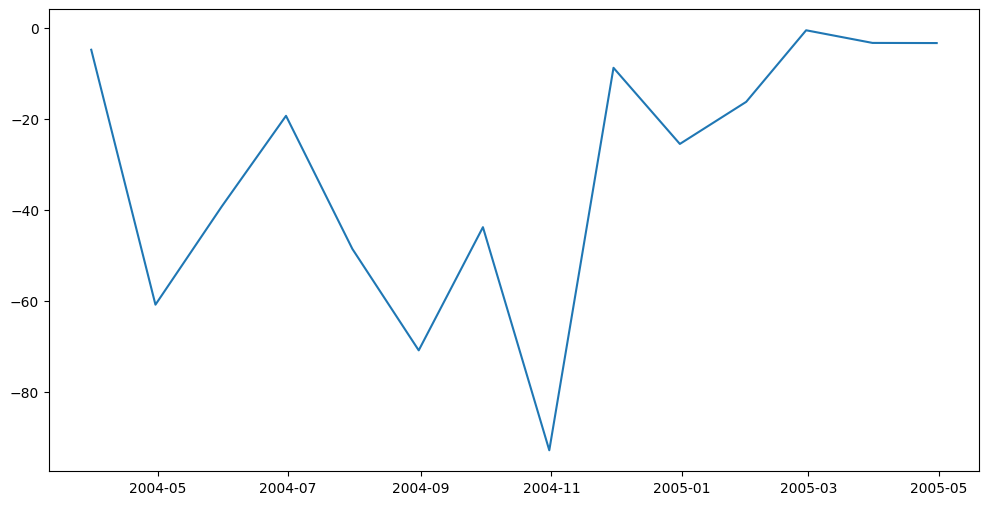

In [ ]:
# Step 7: Visualization and Insights
print("\nGenerating Future Forecasts and Insights...")

# Generate future dates for forecasting
future_steps = 24 * 7  # Forecasting for the next 7 days
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='H')[1:]

# Future forecasting using SARIMA
future_co_forecast = result_co.forecast(steps=future_steps)
future_no2_forecast = result_no2.forecast(steps=future_steps)

# Plot future trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[co_target], label='Historical CO(GT)', color='blue')
plt.plot(future_dates, future_co_forecast, label='Future CO(GT)', color='orange')
plt.title('Future Forecast of CO(GT)')
plt.xlabel('Time')
plt.ylabel('CO(GT) Levels')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data[no2_target], label='Historical NO₂(GT)', color='blue')
plt.plot(future_dates, future_no2_forecast, label='Future NO₂(GT)', color='orange')
plt.title('Future Forecast of NO₂(GT)')
plt.xlabel('Time')
plt.ylabel('NO₂(GT) Levels')
plt.legend()
plt.show()

# Highlight Seasonal Patterns and Recommendations
print("\nInsights and Recommendations:")
# Seasonal analysis (example)
average_co = data[co_target].resample('M').mean()
average_no2 = data[no2_target].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(average_co.index, average_co, label ='Average CO(GT)') # Added label and closing parenthesis
